In [ ]:
# Searching for STIX Quick-Look(ql) X-ray data (LOW Resolution data)

from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido

ql_query = Fido.search(a.Time('2020-06-05', '2020-06-07'), 
                       a.Instrument.stix,
                       a.stix.DataProduct.ql_lightcurve)
ql_query


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str13,str3,str1
2020-06-05 00:00:00.000,2020-06-05 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2020-06-06 00:00:00.000,2020-06-06 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-
2020-06-07 00:00:00.000,2020-06-07 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-


In [23]:
# Downloading the datasets

ql_files = Fido.fetch(ql_query)
print("Downloaded STIX Files:", ql_files)

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

Downloaded STIX Files: ['/home/jashhwanth/sunpy/data/solo_L1_stix-ql-lightcurve_20200605_V02.fits', '/home/jashhwanth/sunpy/data/solo_L1_stix-ql-lightcurve_20200606_V02.fits', '/home/jashhwanth/sunpy/data/solo_L1_stix-ql-lightcurve_20200607_V02.fits']


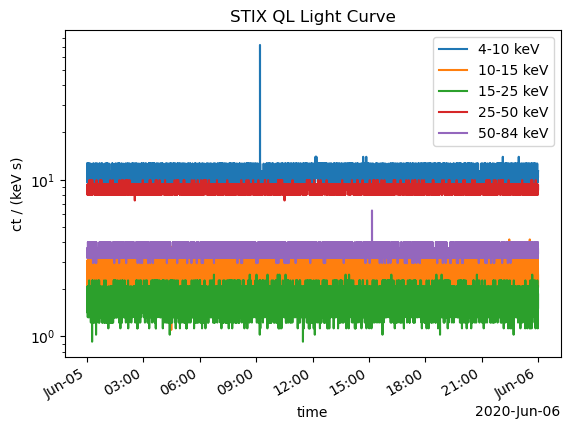

In [25]:
# Loading STIX X-ray time series for 1 st Dataset

from datetime import datetime
from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[0].peek()


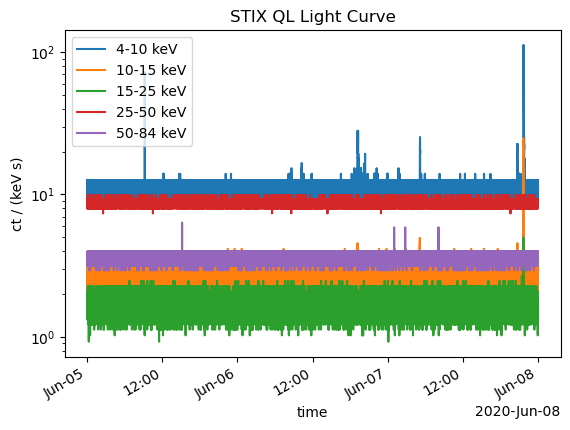

In [26]:
# Combining all the datasets with timeseries 

combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)

combined_ts.peek()

(np.float64(18420.895833333332), np.float64(18420.916666666668))

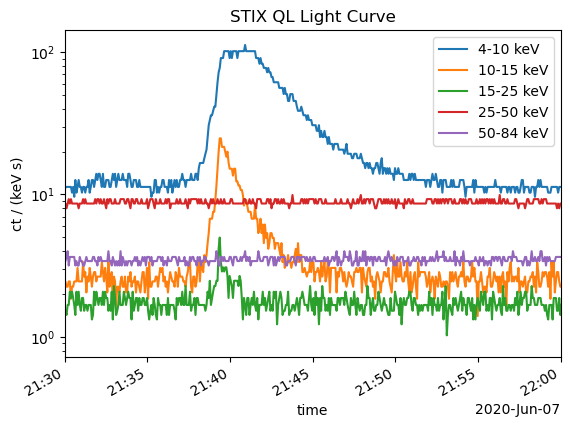

In [27]:
# PLotting the zoomed peak of the combined dataset on JUNE 7, 2020 around 21:30 to 22:00

combined_ts.plot()
plt.xlim(datetime(2020, 6, 7, 21, 30), datetime(2020, 6, 7, 22, 0))


In [3]:
# Searching for STIX Science X-ray data (FULL resolution science data)

from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient 
sci_query = Fido.search(a.Time('2024-05-14T00:00', '2024-05-14T08:00'), 
                        a.Instrument.stix,
                        a.stix.DataType.sci)
print(" Science data of STIX Files:", sci_query)

 Science data of STIX Files: Results from 1 Provider:

12 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2024-05-14 00:27:08.000 2024-05-14 00:29:42.000       STIX    L1      SCI  sci-xray-cpd V02 2405140232
2024-05-14 00:34:14.000 2024-05-14 00:37:48.000       STIX    L1      SCI  sci-xray-cpd V02 2405141740
2024-05-14 00:54:12.000 2024-05-14 03:12:52.000       STIX    L1      SCI  sci-xray-cpd V02 2405144786
2024-05-14 00:54:36.000 2024-05-14 01:00:28.000       STIX    L1      SCI  sci-xray-cpd V02 2405141518
2024-05-14 01:09:35.000 2024-05-14 01:11:01.000       STIX    L1      SCI  sci-xray-cpd V02 2405146104
2024-05-14 01:40:09.000 2024-05-14 01:46:00.000       STIX    L1      SCI  sci-xray-cpd V02 2405148255
2024-05-14 01:58:27.000 2024-05-14 02:18:12.000       STIX    L1      SCI  sci-xray-cpd 

In [4]:
sci_files = Fido.fetch(sci_query[-1])
sci_files = sorted(sci_files)

spec = Product(sci_files[1])
spec

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20240514T005412-20240514T031252_V02_2405144786-50392.fits:   0%|          | 0.00/17.…

solo_L1_stix-sci-xray-cpd_20240514T010935-20240514T011101_V02_2405146104-50391.fits:   0%|          | 0.00/268…

solo_L1_stix-sci-xray-cpd_20240514T002708-20240514T002942_V02_2405140232-50388.fits:   0%|          | 0.00/596…

solo_L1_stix-sci-xray-cpd_20240514T003414-20240514T003748_V02_2405141740-50389.fits:   0%|          | 0.00/685…

solo_L1_stix-sci-xray-cpd_20240514T005436-20240514T010028_V02_2405141518-50390.fits:   0%|          | 0.00/858…

solo_L1_stix-sci-xray-cpd_20240514T014009-20240514T014600_V02_2405148255-53656.fits:   0%|          | 0.00/7.3…

solo_L1_stix-sci-xray-cpd_20240514T015827-20240514T021812_V02_2405149496-65509.fits:   0%|          | 0.00/56.…

solo_L1_stix-sci-xray-cpd_20240514T031146-20240514T035340_V02_2405145888-50393.fits:   0%|          | 0.00/602…

solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits:   0%|          | 0.00/34.…

solo_L1_stix-sci-xray-cpd_20240514T034625-20240514T094612_V02_2405148051-50394.fits:   0%|          | 0.00/9.4…

solo_L1_stix-sci-xray-cpd_20240514T074414-20240514T082113_V02_2405140121-53653.fits:   0%|          | 0.00/11.…

solo_L1_stix-sci-xray-spec_20240514T022958-20240514T083458_V02_2405141390-49950.fits:   0%|          | 0.00/3.…

NameError: name 'Product' is not defined

In [9]:
# Getting Compressed pixel data(cpd)

from sunpy.net import Fido, attrs as a
from stixpy.product import Product

sci_query = Fido.search(a.Time('2024-05-14T00:00', '2024-05-16T06:00'), 
                        a.Instrument.stix,
                        a.stix.DataType.sci)

sci_files = Fido.fetch(sci_query[-1])
#sci_files = sorted(sci_files)

#spec = Product(sci_files[1])
#spec




Files Downloaded:   0%|          | 0/80 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20240514T002708-20240514T002942_V02_2405140232-50388.fits:   0%|          | 0.00/596…

solo_L1_stix-sci-xray-cpd_20240514T005436-20240514T010028_V02_2405141518-50390.fits:   0%|          | 0.00/858…

solo_L1_stix-sci-xray-cpd_20240514T003414-20240514T003748_V02_2405141740-50389.fits:   0%|          | 0.00/685…

solo_L1_stix-sci-xray-cpd_20240514T010935-20240514T011101_V02_2405146104-50391.fits:   0%|          | 0.00/268…

solo_L1_stix-sci-xray-cpd_20240514T005412-20240514T031252_V02_2405144786-50392.fits:   0%|          | 0.00/17.…

solo_L1_stix-sci-xray-cpd_20240514T014009-20240514T014600_V02_2405148255-53656.fits:   0%|          | 0.00/7.3…

solo_L1_stix-sci-xray-cpd_20240514T015827-20240514T021812_V02_2405149496-65509.fits:   0%|          | 0.00/56.…

solo_L1_stix-sci-xray-cpd_20240514T031146-20240514T035340_V02_2405145888-50393.fits:   0%|          | 0.00/602…

solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits:   0%|          | 0.00/34.…

solo_L1_stix-sci-xray-cpd_20240514T034625-20240514T094612_V02_2405148051-50394.fits:   0%|          | 0.00/9.4…

solo_L1_stix-sci-xray-cpd_20240514T121658-20240514T133515_V02_2405141598-50408.fits:   0%|          | 0.00/6.2…

solo_L1_stix-sci-xray-cpd_20240514T123607-20240514T130150_V02_2405144039-50358.fits:   0%|          | 0.00/73.…

solo_L1_stix-sci-xray-cpd_20240514T133248-20240514T163945_V02_2405143424-50409.fits:   0%|          | 0.00/2.5…

solo_L1_stix-sci-xray-cpd_20240514T074414-20240514T082113_V02_2405140121-53653.fits:   0%|          | 0.00/11.…

solo_L1_stix-sci-xray-cpd_20240514T094250-20240514T121853_V02_2405141469-50395.fits:   0%|          | 0.00/2.1…

solo_L1_stix-sci-xray-cpd_20240514T143230-20240514T143718_V02_2405149738-50410.fits:   0%|          | 0.00/726…

solo_L1_stix-sci-xray-cpd_20240514T151034-20240514T152726_V02_2405147602-50411.fits:   0%|          | 0.00/5.3…

solo_L1_stix-sci-xray-cpd_20240514T154839-20240514T155227_V02_2405145820-50412.fits:   0%|          | 0.00/1.0…

solo_L1_stix-sci-xray-cpd_20240514T155700-20240514T160231_V02_2405144674-50413.fits:   0%|          | 0.00/1.2…

solo_L1_stix-sci-xray-cpd_20240514T162700-20240514T190550_V02_2405143076-50414.fits:   0%|          | 0.00/19.…

solo_L1_stix-sci-xray-cpd_20240514T163846-20240514T171415_V02_2405147703-49189.fits:   0%|          | 0.00/85.…

solo_L1_stix-sci-xray-cpd_20240514T163859-20240514T165141_V02_2405141942-50862.fits:   0%|          | 0.00/49.…

solo_L1_stix-sci-xray-cpd_20240514T171316-20240514T180141_V02_2405149109-51418.fits:   0%|          | 0.00/9.6…

solo_L1_stix-sci-xray-cpd_20240514T180146-20240514T180948_V02_2405141769-50415.fits:   0%|          | 0.00/19.…

solo_L1_stix-sci-xray-cpd_20240514T190229-20240514T225508_V02_2405146434-50416.fits:   0%|          | 0.00/4.0…

solo_L1_stix-sci-xray-cpd_20240514T220413-20240514T221049_V02_2405140931-50417.fits:   0%|          | 0.00/3.2…

solo_L1_stix-sci-xray-cpd_20240514T225320-20240515T002704_V02_2405148166-50418.fits:   0%|          | 0.00/2.4…

solo_L1_stix-sci-xray-cpd_20240514T225931-20240514T230914_V02_2405141268-50441.fits:   0%|          | 0.00/4.9…

solo_L1_stix-sci-xray-spec_20240514T022958-20240514T083458_V02_2405141390-49950.fits:   0%|          | 0.00/3.…

solo_L1_stix-sci-xray-spec_20240514T143000-20240514T203500_V02_2405140041-49952.fits:   0%|          | 0.00/4.…

solo_L1_stix-sci-xray-spec_20240514T082958-20240514T143501_V02_2405147487-49951.fits:   0%|          | 0.00/4.…

solo_L1_stix-sci-xray-spec_20240514T203001-20240515T023501_V02_2405148322-49953.fits:   0%|          | 0.00/2.…

solo_L1_stix-sci-xray-cpd_20240515T002346-20240515T033343_V02_2405153845-50419.fits:   0%|          | 0.00/4.8…

solo_L1_stix-sci-xray-cpd_20240515T004451-20240515T004646_V02_2405152037-50420.fits:   0%|          | 0.00/222…

solo_L1_stix-sci-xray-cpd_20240515T010028-20240515T010408_V02_2405155889-50421.fits:   0%|          | 0.00/573…

solo_L1_stix-sci-xray-cpd_20240515T013641-20240515T014152_V02_2405156322-50422.fits:   0%|          | 0.00/1.0…

solo_L1_stix-sci-xray-cpd_20240515T020742-20240515T021432_V02_2405159169-50423.fits:   0%|          | 0.00/1.5…

solo_L1_stix-sci-xray-cpd_20240515T031525-20240515T031840_V02_2405152997-50424.fits:   0%|          | 0.00/507…

solo_L1_stix-sci-xray-cpd_20240515T033318-20240515T034111_V02_2405158428-50425.fits:   0%|          | 0.00/835…

solo_L1_stix-sci-xray-cpd_20240515T035353-20240515T044245_V02_2405156443-50426.fits:   0%|          | 0.00/1.2…

solo_L1_stix-sci-xray-cpd_20240515T044450-20240515T044825_V02_2405158386-50427.fits:   0%|          | 0.00/596…

solo_L1_stix-sci-xray-cpd_20240515T045012-20240515T045717_V02_2405156845-50428.fits:   0%|          | 0.00/164…

solo_L1_stix-sci-xray-cpd_20240515T051158-20240515T053739_V02_2405151471-50429.fits:   0%|          | 0.00/596…

solo_L1_stix-sci-xray-cpd_20240515T053847-20240515T060719_V02_2405152126-50430.fits:   0%|          | 0.00/444…

solo_L1_stix-sci-xray-cpd_20240515T061837-20240515T062033_V02_2405155008-50406.fits:   0%|          | 0.00/63.…

solo_L1_stix-sci-xray-cpd_20240515T062142-20240515T065229_V02_2405156403-50431.fits:   0%|          | 0.00/838…

solo_L1_stix-sci-xray-cpd_20240515T065104-20240515T123544_V02_2405154252-50432.fits:   0%|          | 0.00/49.…

solo_L1_stix-sci-xray-cpd_20240515T065519-20240515T065707_V02_2405158009-50407.fits:   0%|          | 0.00/63.…

solo_L1_stix-sci-xray-cpd_20240515T080556-20240515T084800_V02_2405155818-49967.fits:   0%|          | 0.00/121…

solo_L1_stix-sci-xray-cpd_20240515T084705-20240515T093153_V02_2405150533-53368.fits:   0%|          | 0.00/17.…

solo_L1_stix-sci-xray-cpd_20240515T093258-20240515T095424_V02_2405154142-50442.fits:   0%|          | 0.00/9.0…

solo_L1_stix-sci-xray-cpd_20240515T103055-20240515T104640_V02_2405155896-50443.fits:   0%|          | 0.00/6.6…

solo_L1_stix-sci-xray-cpd_20240515T123441-20240515T135420_V02_2405155799-50434.fits:   0%|          | 0.00/1.1…

solo_L1_stix-sci-xray-cpd_20240515T123714-20240515T124129_V02_2405158163-50433.fits:   0%|          | 0.00/1.1…

solo_L1_stix-sci-xray-cpd_20240515T135214-20240515T144918_V02_2405154857-50435.fits:   0%|          | 0.00/35.…

solo_L1_stix-sci-xray-cpd_20240515T144811-20240515T173836_V02_2405156747-50436.fits:   0%|          | 0.00/13.…

solo_L1_stix-sci-xray-cpd_20240515T173559-20240515T184857_V02_2405154967-50437.fits:   0%|          | 0.00/1.9…

solo_L1_stix-sci-xray-cpd_20240515T184724-20240515T202035_V02_2405153111-50438.fits:   0%|          | 0.00/2.4…

solo_L1_stix-sci-xray-cpd_20240515T192729-20240515T192911_V02_2405151784-50439.fits:   0%|          | 0.00/377…

solo_L1_stix-sci-xray-cpd_20240515T193741-20240515T194025_V02_2405159894-50836.fits:   0%|          | 0.00/896…

solo_L1_stix-sci-xray-cpd_20240515T201511-20240515T204946_V02_2405158042-49974.fits:   0%|          | 0.00/83.…

solo_L1_stix-sci-xray-cpd_20240515T201554-20240515T214332_V02_2405154510-50440.fits:   0%|          | 0.00/6.9…

solo_L1_stix-sci-xray-cpd_20240515T204843-20240515T210603_V02_2405153335-53367.fits:   0%|          | 0.00/13.…

solo_L1_stix-sci-xray-cpd_20240515T214220-20240516T010314_V02_2405150142-50837.fits:   0%|          | 0.00/5.1…

solo_L1_stix-sci-xray-spec_20240515T022958-20240515T083459_V02_2405153125-49954.fits:   0%|          | 0.00/2.…

solo_L1_stix-sci-xray-spec_20240515T082959-20240515T143459_V02_2405156793-50335.fits:   0%|          | 0.00/6.…

solo_L1_stix-sci-xray-spec_20240515T142959-20240515T203458_V02_2405155111-50336.fits:   0%|          | 0.00/4.…

solo_L1_stix-sci-xray-spec_20240515T202958-20240516T023505_V02_2405157409-50337.fits:   0%|          | 0.00/3.…

solo_L1_stix-sci-xray-cpd_20240516T010055-20240516T013009_V02_2405169302-50838.fits:   0%|          | 0.00/8.7…

solo_L1_stix-sci-xray-cpd_20240516T011058-20240516T011408_V02_2405169686-53766.fits:   0%|          | 0.00/7.9…

solo_L1_stix-sci-xray-cpd_20240516T013005-20240516T040004_V02_2405160738-50839.fits:   0%|          | 0.00/2.6…

solo_L1_stix-sci-xray-cpd_20240516T032810-20240516T033253_V02_2405165898-50840.fits:   0%|          | 0.00/683…

solo_L1_stix-sci-xray-cpd_20240516T035436-20240516T044731_V02_2405165416-50841.fits:   0%|          | 0.00/2.1…

solo_L1_stix-sci-xray-cpd_20240516T041007-20240516T042102_V02_2405160765-51424.fits:   0%|          | 0.00/6.0…

solo_L1_stix-sci-xray-cpd_20240516T044847-20240516T045155_V02_2405166738-50842.fits:   0%|          | 0.00/420…

solo_L1_stix-sci-xray-cpd_20240516T050523-20240516T051922_V02_2405168208-50843.fits:   0%|          | 0.00/999…

solo_L1_stix-sci-xray-cpd_20240516T053519-20240516T053829_V02_2405160276-50832.fits:   0%|          | 0.00/63.…

solo_L1_stix-sci-xray-cpd_20240516T053851-20240516T055234_V02_2405167476-50833.fits:   0%|          | 0.00/69.…

solo_L1_stix-sci-xray-cpd_20240516T055630-20240516T055831_V02_2405160446-50834.fits:   0%|          | 0.00/63.…

solo_L1_stix-sci-xray-spec_20240516T022959-20240516T083500_V02_2405167098-50338.fits:   0%|          | 0.00/1.…

2025-02-10 18:16:32 - parfive - INFO: https://pub099.cs.technik.fhnw.ch/data/fits/L1/2024/05/14/SCI/solo_L1_stix-sci-xray-cpd_20240514T005412-20240514T031252_V02_2405144786-50392.fits failed to download with exception
Timeout on reading data from socket
2025-02-10 18:16:32 - parfive - INFO: https://pub099.cs.technik.fhnw.ch/data/fits/L1/2024/05/14/SCI/solo_L1_stix-sci-xray-cpd_20240514T014009-20240514T014600_V02_2405148255-53656.fits failed to download with exception
Timeout on reading data from socket
2025-02-10 18:16:32 - parfive - INFO: https://pub099.cs.technik.fhnw.ch/data/fits/L1/2024/05/14/SCI/solo_L1_stix-sci-xray-cpd_20240514T015827-20240514T021812_V02_2405149496-65509.fits failed to download with exception
Timeout on reading data from socket
2025-02-10 18:16:32 - parfive - INFO: https://pub099.cs.technik.fhnw.ch/data/fits/L1/2024/05/14/SCI/solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits failed to download with exception
Timeout on reading d

5/0 files failed to download. Please check `.errors` for details


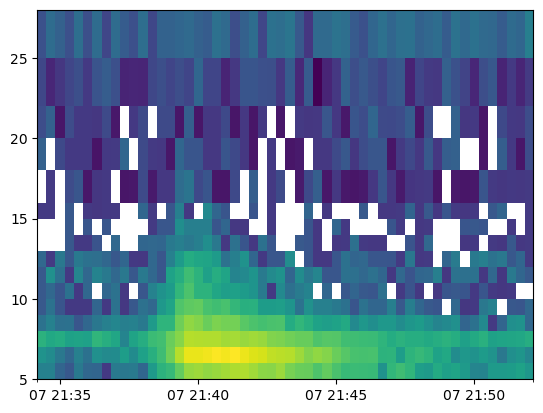

In [36]:
# PLotting Spectrogram covering similar time range of CPD

spec.plot_spectrogram()